## EDA on NUGT, DUST, and GLD
Looking at the stocks related to gold prices.
Testing hypotheses:
* how correlated are these stocks?
* what are the biggest up/down moves for them?
* how well can we predict future prices?

In [1]:
import sys
sys.path.append('../code')
import scrape_yahoo as sy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sy.download_stocks()

https://ichart.yahoo.com/table.csv?s=GLD&a=0&b=0&c=0&d=04&e=25&f=2017
https://ichart.yahoo.com/table.csv?s=DUST&a=0&b=0&c=0&d=04&e=25&f=2017
https://ichart.yahoo.com/table.csv?s=NUGT&a=0&b=0&c=0&d=04&e=25&f=2017


In [3]:
dfs = sy.load_stocks()

In [4]:
dfs.keys()

dict_keys(['GLD', 'NUGT', 'DUST'])

In [5]:
NUGT = dfs['NUGT']
DUST = dfs['DUST']
GLD = dfs['GLD']

In [6]:
NUGT.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-24,9.28,9.65,9.21,9.36,31491500.0,9.36
2017-04-21,9.96,10.14,9.72,9.87,36263800.0,9.87
2017-04-20,9.70,10.12,9.60,9.84,30196300.0,9.84
2017-04-19,10.50,10.53,9.50,9.64,54166700.0,9.64
2017-04-18,10.96,11.01,10.41,10.80,39339000.0,10.80


In [8]:
NUGT['Open'] = NUGT['Open'] * NUGT['Adj Close'] / NUGT['Close']

In [9]:
NUGT.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-12-14,3839.427653,40.319999,39.309999,39.679999,500.0,3814.433882
2010-12-13,3871.150517,40.719999,39.509999,39.619999,500.0,3808.666089
2010-12-10,3706.768409,39.229999,37.749999,39.009999,2500.0,3750.026859
2010-12-09,3766.368941,39.259999,38.259999,38.699999,4000.0,3720.226594
2010-12-08,3775.020631,40.599999,38.039999,38.389999,2000.0,3690.426329


In [13]:
te = NUGT.iloc[-1]

In [14]:
last_ratio = te['Close'] / te['Adj Close']
last_ratio

0.010402591889810896

In [6]:
df = sy.normalize_prices(NUGT)

In [7]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-25,0.093623,0.093727,0.081764,0.084989,74354700.0,8.17
2017-04-24,0.096536,0.100385,0.095808,0.097368,31491500.0,9.36
2017-04-21,0.103610,0.105482,0.101113,0.102674,36263800.0,9.87
2017-04-20,0.100905,0.105274,0.099865,0.102362,30196300.0,9.84
2017-04-19,0.109227,0.109539,0.098825,0.100281,54166700.0,9.64


In [8]:
NUGT.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-25,9.00,9.01,7.86,8.17,74354700.0,8.17
2017-04-24,9.28,9.65,9.21,9.36,31491500.0,9.36
2017-04-21,9.96,10.14,9.72,9.87,36263800.0,9.87
2017-04-20,9.70,10.12,9.60,9.84,30196300.0,9.84
2017-04-19,10.50,10.53,9.50,9.64,54166700.0,9.64


In [9]:
NUGT.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-12-14,39.939999,40.319999,39.309999,39.679999,500.0,3814.433882
2010-12-13,40.269999,40.719999,39.509999,39.619999,500.0,3808.666089
2010-12-10,38.559999,39.229999,37.749999,39.009999,2500.0,3750.026859
2010-12-09,39.179999,39.259999,38.259999,38.699999,4000.0,3720.226594
2010-12-08,39.269999,40.599999,38.039999,38.389999,2000.0,3690.426329


In [10]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-12-14,39.939999,40.319999,39.309999,39.679999,500.0,3814.433882
2010-12-13,40.269999,40.719999,39.509999,39.619999,500.0,3808.666089
2010-12-10,38.559999,39.229999,37.749999,39.009999,2500.0,3750.026859
2010-12-09,39.179999,39.259999,38.259999,38.699999,4000.0,3720.226594
2010-12-08,39.269999,40.599999,38.039999,38.389999,2000.0,3690.426329


In [12]:
38*3700/38/3700*38

38.0

## create some new features related to differences in price metrics

In [18]:
NUGT['close-open'] = NUGT['Close'] - NUGT['Open']
NUGT['high-low'] = NUGT['High'] - NUGT['Low']
DUST['close-open'] = DUST['Close'] - DUST['Open']
DUST['high-low'] = DUST['High'] - DUST['Low']
GLD['close-open'] = NUGT['Close'] - NUGT['Open']
GLD['high-low'] = NUGT['High'] - NUGT['Low']

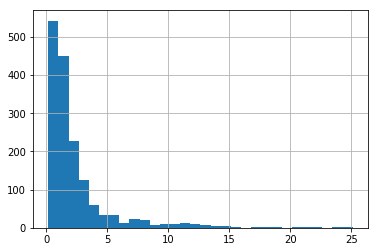

In [14]:
f = NUGT['high-low'].hist(bins=30)

Hmm...looks like maybe a weak bi-modal distribution.  There's a slight bump around 12

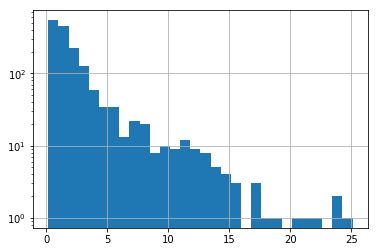

In [15]:
f = NUGT['high-low'].hist(bins=30)
ax = plt.gca()
ax.set_yscale("log", nonposy='clip')

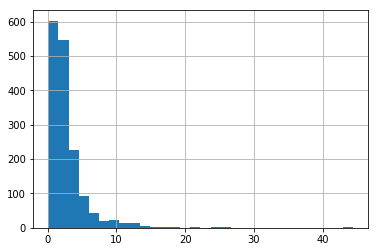

In [19]:
f = DUST['high-low'].hist(bins=30)

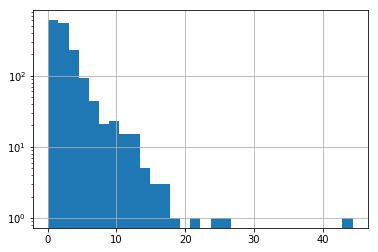

In [20]:
f = DUST['high-low'].hist(bins=30)
ax = plt.gca()
ax.set_yscale("log", nonposy='clip')

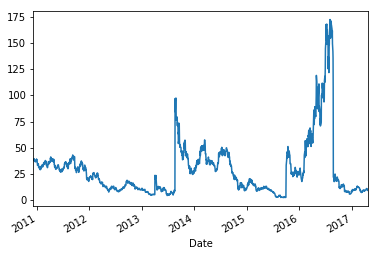

In [24]:
f = NUGT['Close'].plot()

# generate simple time-lagged feature
Question: based on a week of data, can we predict the price one week in the future?  E.g., given data from M-F, can we predict the close price next Friday?


I suppose a good question to ask would be can we predict large movements up or down one week out in the future?

In [22]:
# set hyperparameters
history_days = 5  # number of days to use for prediction
future_days = 5  # days out in the future we want to predict for
data_points = NUGT.shape[0]

In [ ]:
for i in range(history_days, )